In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset folder
dataset_path = '/home/batch25/Desktop/initial data'

# Initialize the ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values
    rotation_range=20,          # Rotate images by 20 degrees
    width_shift_range=0.1,      # Shift images horizontally
    height_shift_range=0.1,     # Shift images vertically
    zoom_range=0.2,             # Apply zoom
    horizontal_flip=True        # Flip images horizontally
)

# Create a generator to load images in batches with labels
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),     # Resize to the input shape of your model
    batch_size=32,
    class_mode='categorical'    # Use 'categorical' for multi-class labels
)


2024-11-07 23:49:01.805533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731003541.816396   11438 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731003541.819806   11438 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 23:49:01.831893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 274 images belonging to 5 classes.


In [2]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 80.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 55.3 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 75.2 MB/s eta 0:00:00


In [8]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for your hasta gestures
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3010 - loss: 1.9520
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5386 - loss: 1.0851
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6766 - loss: 0.8379
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7956 - loss: 0.6012
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8680 - loss: 0.4613
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.8514 - loss: 0.4086
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.8881 - loss: 0.3728
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9185 - loss: 0.2576
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8542 - loss: 0.3429
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9005 - loss: 0.2884


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the data generator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_data = datagen.flow_from_directory(
    '/home/batch25/Desktop/initial data',  # Path to the main folder
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use 80% of data for training
)

# Validation data generator
val_data = datagen.flow_from_directory(
    '/home/batch25/Desktop/initial data',  # Path to the main folder
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% of data for validation
)



Found 221 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


In [16]:
import os

dataset_path = '/home/batch25/Desktop/initial data'  # Your root dataset path
classes = os.listdir(dataset_path)
print("Classes:", classes)

for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        print(f"{class_name}: {len(os.listdir(class_folder))} images")


Classes: ['20', '12', '10', '1', '5']
20: 51 images
12: 54 images
10: 55 images
1: 60 images
5: 54 images


In [17]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the MobileNet base model, excluding the top fully connected layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers so they aren't trained
base_model.trainable = False

# Build the custom model on top of MobileNet
model = Sequential([
    base_model,  # Use the pre-trained MobileNet model
    GlobalAveragePooling2D(),  # Global average pooling to flatten the features
    Dense(128, activation='relu'),  # A dense layer with 128 units
    Dense(5, activation='softmax')  # Output layer with 5 classes (for the 5 hasta gestures)
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,  # Your training data generator
    epochs=10,  # Number of epochs
    validation_data=val_data  # Your validation data generator
)


/home/batch25/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.2423 - loss: 2.2436 - val_accuracy: 0.3019 - val_loss: 1.5599
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5823 - loss: 1.0279 - val_accuracy: 0.4151 - val_loss: 1.4296
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8641 - loss: 0.6021 - val_accuracy: 0.4717 - val_loss: 1.2664
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9139 - loss: 0.4050 - val_accuracy: 0.5094 - val_loss: 1.3399
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9396 - loss: 0.2801 - val_accuracy: 0.5472 - val_loss: 1.1699
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9756 - loss: 0.1760 - val_accuracy: 0.5283 - val_loss: 1.2916
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9926 - loss: 0.1035 - val_accuracy: 0.5660 - val_loss: 1.2575
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9974 - loss: 0.0768 - val_accuracy: 0.5283 - val_loss: 1.2140
Epoch 9/

In [3]:
# Save the model in the Keras native format
model.save('hasta_gesture_model.keras')


NameError: name 'model' is not defined

In [22]:
from sklearn.model_selection import train_test_split
import os
import numpy as np
import os

# Path to your dataset
dataset_dir = '/home/batch25/Desktop/initial data'

# List all class labels (folders)
class_names = os.listdir(dataset_dir)

# Filter out any non-directory files (just in case)
class_names = [class_name for class_name in class_names if os.path.isdir(os.path.join(dataset_dir, class_name))]

# Print number of classes
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")

# Assuming your images are stored in a directory structure where each class is in its own folder
dataset_dir = '/home/batch25/Desktop/initial data'  # Path to your dataset

# List all the class labels
class_names = os.listdir(dataset_dir)

# Prepare lists to hold file paths and their corresponding labels
image_paths = []
labels = []

# Loop through the dataset and collect image paths and labels
for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        image_paths.append(img_path)
        labels.append(idx)  # Numeric label corresponding to the class

# Convert to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")


Number of classes: 5
Class names: ['20', '12', '10', '1', '5']
Training set size: 219
Validation set size: 55


In [23]:
from collections import Counter

# Check class distribution in the training set
print(f"Training class distribution: {Counter(y_train)}")

# Check class distribution in the validation set
print(f"Validation class distribution: {Counter(y_val)}")


Training class distribution: Counter({3: 48, 2: 44, 4: 43, 1: 43, 0: 41})
Validation class distribution: Counter({3: 12, 2: 11, 1: 11, 4: 11, 0: 10})


In [24]:
import os
import shutil

# Paths to your new train and validation directories
train_dir = '/home/batch25/Desktop/train_data'
val_dir = '/home/batch25/Desktop/val_data'

# Create directories for training and validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create class subdirectories within the train and validation directories
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# Move images to the corresponding directories based on the split
for img_path, label in zip(X_train, y_train):
    class_name = class_names[label]
    shutil.copy(img_path, os.path.join(train_dir, class_name))

for img_path, label in zip(X_val, y_val):
    class_name = class_names[label]
    shutil.copy(img_path, os.path.join(val_dir, class_name))

print("Data has been split into train and validation directories.")


Data has been split into train and validation directories.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an ImageDataGenerator for validation (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Apply the data generators to your dataset
train_generator = train_datagen.flow_from_directory(
    '/home/batch25/Desktop/train_data',  # Update with the actual path
    target_size=(128, 128),  # Resize the images if needed
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/home/batch25/Desktop/val_data',  # Update with the actual path
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 219 images belonging to 5 classes.
Found 55 images belonging to 5 classes.


In [3]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the MobileNet base model, excluding the top fully connected layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers so they aren't trained
base_model.trainable = False

# Build the custom model on top of MobileNet
model = Sequential([
    base_model,  # Use the pre-trained MobileNet model
    GlobalAveragePooling2D(),  # Global average pooling to flatten the features
    Dense(128, activation='relu'),  # A dense layer with 128 units
    Dense(5, activation='softmax')  # Output layer with 5 classes (for the 5 hasta gestures)
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,  # Your training data generator
    epochs=10,  # Number of epochs
    validation_data=val_generator # Your validation data generator
)


/home/batch25/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3001 - loss: 1.7246

/home/batch25/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.3026 - loss: 1.7133 - val_accuracy: 0.5091 - val_loss: 1.2881
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.5448 - loss: 1.1933 - val_accuracy: 0.6364 - val_loss: 1.0045
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7071 - loss: 0.7933 - val_accuracy: 0.5636 - val_loss: 0.9621
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7612 - loss: 0.6487 - val_accuracy: 0.6909 - val_loss: 0.8364
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8677 - loss: 0.4902 - val_accuracy: 0.7455 - val_loss: 0.7595
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.9037 - loss: 0.3978 - val_accuracy: 0.7818 - val_loss: 0.6735
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8859 - loss: 0.3468 - val_accuracy: 0.7273 - val_loss: 0.7835
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.8870 - loss: 0.3301 - val_accuracy: 0.7273 - val_loss: 0.6615
Epoch 9/10
7/7 ━━━━

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 base model, excluding the top fully connected layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers so they aren't trained
base_model.trainable = False

# Build the custom model on top of ResNet50
model = Sequential([
    base_model,  # Use the pre-trained ResNet50 model
    GlobalAveragePooling2D(),  # Global average pooling to flatten the features
    Dense(128, activation='relu'),  # A dense layer with 128 units
    Dense(5, activation='softmax')  # Output layer with 5 classes (for the 5 hasta gestures)
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,  # Your training data generator
    epochs=10,  # Number of epochs
    validation_data=val_generator # Your validation data generator
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.2176 - loss: 1.7605 - val_accuracy: 0.2182 - val_loss: 1.6539
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.2421 - loss: 1.6564 - val_accuracy: 0.2182 - val_loss: 1.6093
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.1861 - loss: 1.6214 - val_accuracy: 0.1818 - val_loss: 1.6255
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.1805 - loss: 1.6274 - val_accuracy: 0.2000 - val_loss: 1.6057
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.2122 - loss: 1.6144 - val_accuracy: 0.2182 - val_loss: 1.6102
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.2339 - loss: 1.6150 - val_accuracy: 0.2364 - val_loss: 1.6075
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.1540 - loss: 1.6186 - val_accuracy: 0.2000 - val_loss: 1.6063
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.1494 - loss: 1.6194 - val_accuracy: 0.2182 - val_loss: 1.6079
Epoch 9/

In [5]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNet as the base model with pre-trained ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze all layers for initial training

# Build the model on top of MobileNet
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Output layer with 5 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Initial training with frozen layers
model.fit(train_generator, epochs=10, validation_data=val_generator)

# **Fine-Tuning Step**

# Unfreeze the last few layers of MobileNet for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Unfreeze the last 20 layers
    layer.trainable = False

# Compile again with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    epochs=5,  # Fewer epochs to avoid overfitting
    validation_data=val_generator
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.1756 - loss: 2.5728 - val_accuracy: 0.3636 - val_loss: 1.7870
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.3718 - loss: 1.7677 - val_accuracy: 0.5455 - val_loss: 1.1512
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4941 - loss: 1.2065 - val_accuracy: 0.5818 - val_loss: 1.0823
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5897 - loss: 1.0481 - val_accuracy: 0.5636 - val_loss: 1.0285
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5851 - loss: 1.1308 - val_accuracy: 0.6727 - val_loss: 0.9329
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.6384 - loss: 0.9550 - val_accuracy: 0.6545 - val_loss: 0.9223
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.6076 - loss: 0.8847 - val_accuracy: 0.6182 - val_loss: 0.9240
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.6518 - loss: 0.8169 - val_accuracy: 0.7818 - val_loss: 0.8610
Epoch 9/

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNet as the base model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze layers initially

# Build the model on top of MobileNet
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Output layer with 5 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Initial training with frozen layers
history_initial = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Try unfreezing only the last 10 layers
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Add Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    epochs=15,  # More epochs to allow fine-tuning adjustments
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.2559 - loss: 2.0193 - val_accuracy: 0.3091 - val_loss: 1.4372
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3936 - loss: 1.4522 - val_accuracy: 0.5636 - val_loss: 1.2209
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5378 - loss: 1.1273 - val_accuracy: 0.6182 - val_loss: 1.1007
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5855 - loss: 0.9269 - val_accuracy: 0.6909 - val_loss: 1.0711
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5771 - loss: 1.0181 - val_accuracy: 0.7091 - val_loss: 0.9846
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.6096 - loss: 0.9075 - val_accuracy: 0.6909 - val_loss: 0.9298
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7150 - loss: 0.7246 - val_accuracy: 0.6727 - val_loss: 0.9334
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7037 - loss: 0.7100 - val_accuracy: 0.7273 - val_loss: 0.8068
Epoch 9/

In [6]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load the MobileNet base model, excluding the top fully connected layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers initially
base_model.trainable = False

# Build the custom model on top of MobileNet
model = Sequential([
    base_model,                     # Pre-trained MobileNet base model
    GlobalAveragePooling2D(),        # Global average pooling to flatten the features
    Dense(128, activation='relu'),   # Dense layer with 128 units
    Dropout(0.5),                    # Dropout to help prevent overfitting
    Dense(5, activation='softmax')   # Output layer with 5 classes (for 5 hasta gestures)
])

# Compile the model with an initial low learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up the data generators for training and validation with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Replace 'path_to_train_data' and 'path_to_val_data' with the actual paths to the training and validation directories
train_generator = train_datagen.flow_from_directory(
    '/home/batch25/Desktop/train_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/home/batch25/Desktop/val_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Initial training with frozen layers
initial_history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

# Start fine-tuning: Unfreeze the last few layers of the base model
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks for early stopping and reducing the learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    epochs=50,                      # Allow more epochs for fine-tuning
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Optionally, unfreeze more layers if accuracy stabilizes or needs improvement
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Re-compile and continue fine-tuning if necessary
model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

final_fine_tune_history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Summary of model architecture
model.summary()


Found 219 images belonging to 5 classes.
Found 55 images belonging to 5 classes.
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.2334 - loss: 2.9169 - val_accuracy: 0.2909 - val_loss: 1.8168
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3496 - loss: 1.7303 - val_accuracy: 0.5455 - val_loss: 1.2218
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.4087 - loss: 1.3707 - val_accuracy: 0.5091 - val_loss: 1.2120
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4615 - loss: 1.2038 - val_accuracy: 0.4909 - val_loss: 1.1466
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5811 - loss: 1.0419 - val_accuracy: 0.5818 - val_loss: 1.0193
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6207 - loss: 0.9956 - val_accuracy: 0.6364 - val_loss: 0.9505
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.6896 - loss: 0.8475 - val_accuracy: 0.5818 - val_loss: 0.9427
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,800,849 (25.94 MB)

 Trainable params: 1,720,069 (6.56 MB)

 Non-trainable params: 1,640,640 (6.26 MB)

 Optimizer params: 3,440,140 (13.12 MB)

In [2]:
model.save('hasta_gesture_model_mobilenet.keras')

NameError: name 'model' is not defined

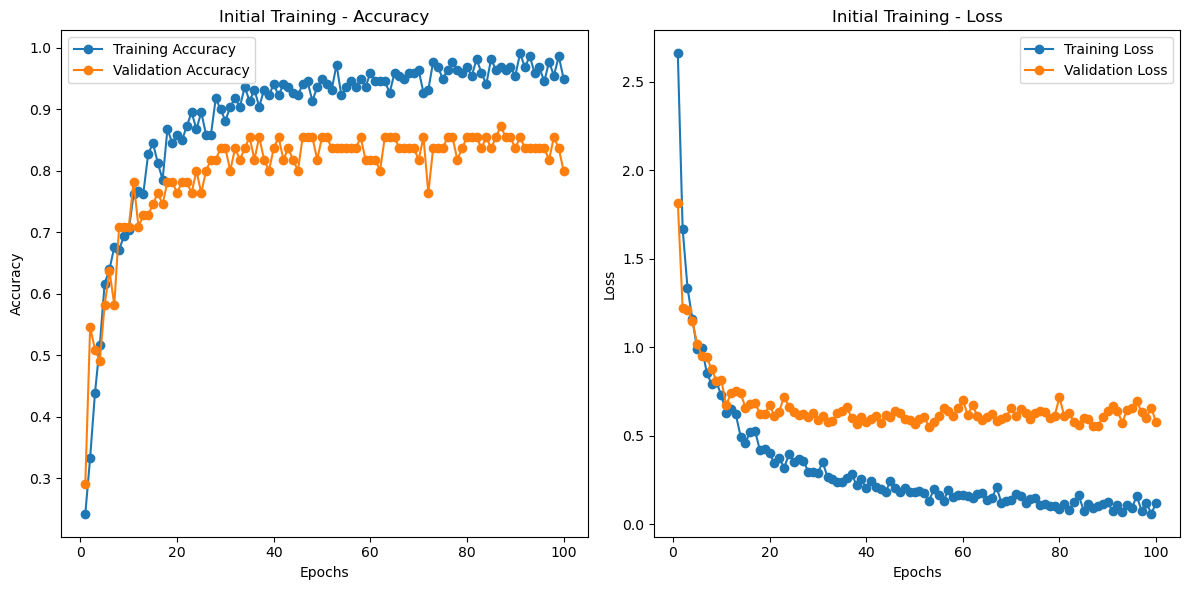

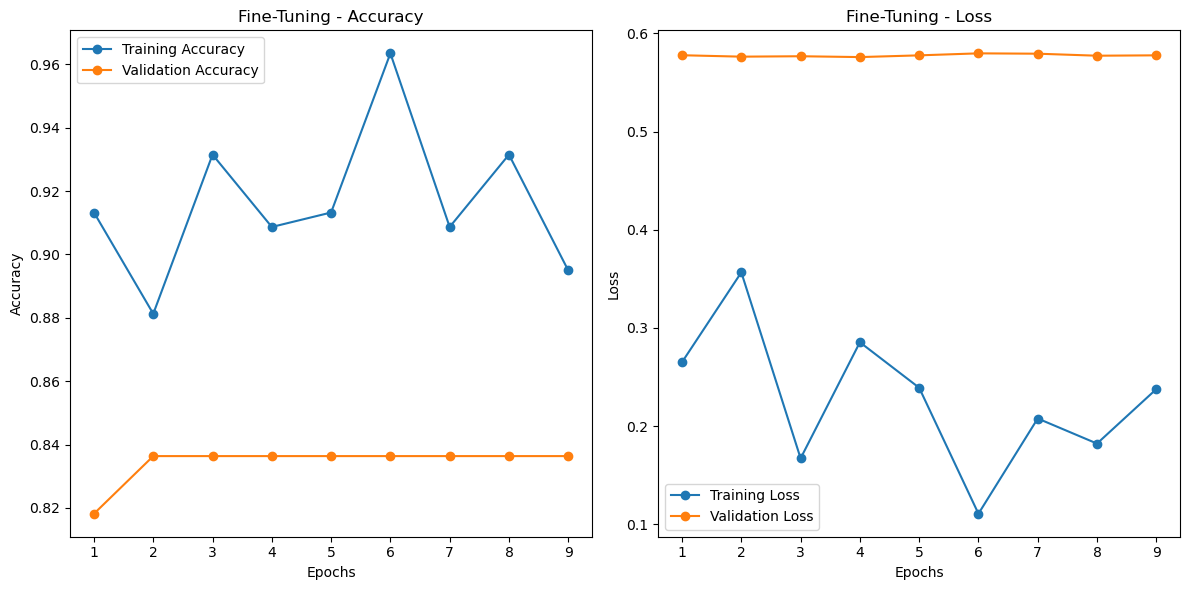

In [10]:
import matplotlib.pyplot as plt

# Assuming `history` contains the model training history (e.g., `initial_history`, `fine_tune_history`, etc.)

def plot_training_history(final_fine_tune_history, title_prefix="Model Training"):
    # Get the metrics
    acc = final_fine_tune_history.history['accuracy']
    val_acc = final_fine_tune_history.history['val_accuracy']
    loss = final_fine_tune_history.history['loss']
    val_loss = final_fine_tune_history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title(f"{title_prefix} - Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title(f"{title_prefix} - Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Example Usage:
plot_training_history(initial_history, title_prefix="Initial Training")
plot_training_history(fine_tune_history, title_prefix="Fine-Tuning")


In [10]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Load the previously saved model
model = load_model('/home/batch25/hasta_gesture_model_mobilenet.keras')  # Replace with your saved model path

# Assuming you have a test data generator (test_generator)
# Make predictions on the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Get true labels for the test set
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# If you want a detailed classification report (for each class):
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Compute confusion matrix if needed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'test_generator' is not defined

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7348 - loss: 0.7680
Test Loss: 0.8261129260063171
Test Accuracy: 0.7272727489471436
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


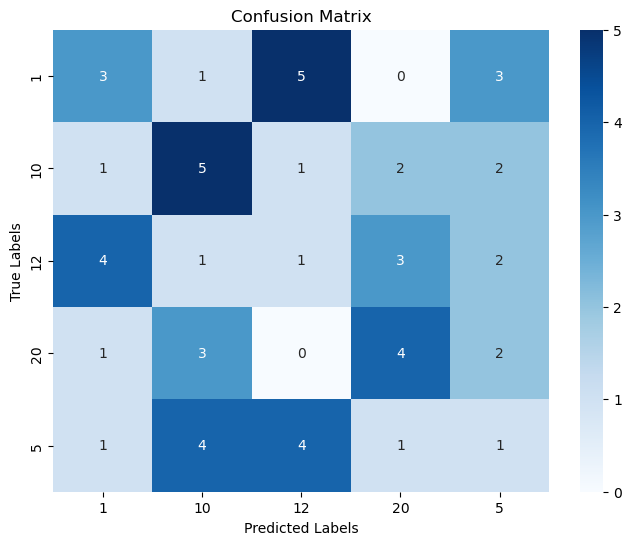

              precision    recall  f1-score   support

           1       0.30      0.25      0.27        12
          10       0.36      0.45      0.40        11
          12       0.09      0.09      0.09        11
          20       0.40      0.40      0.40        10
           5       0.10      0.09      0.10        11

    accuracy                           0.25        55
   macro avg       0.25      0.26      0.25        55
weighted avg       0.25      0.25      0.25        55



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(val_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test data
y_pred = model.predict(val_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Get true labels for the test set
y_true = val_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=val_generator.class_indices.keys(), 
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report (precision, recall, F1-score)
report = classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys())
print(report)


In [12]:
train_generator = train_datagen.flow_from_directory(
    '/home/batch25/Desktop/train_data',  # Path to your training data
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Accessing class labels
class_labels = train_generator.class_indices
print(class_labels)

Found 219 images belonging to 5 classes.
{'1': 0, '10': 1, '12': 2, '20': 3, '5': 4}


In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

# Step 1: Load the trained model (if not already loaded)
model = load_model('/home/batch25/hasta_gesture_model.keras')

# Step 2: Load and preprocess the image
img_path = '/home/batch25/Downloads/test image/istockphoto-94364218-1024x1024.jpg'  # Replace with the image path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to the same size as used in training
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (since we only have 1 image)
img_array = preprocess_input(img_array)  # Apply any preprocessing like normalization, based on your model

# Step 3: Predict the class
predictions = model.predict(img_array)

# Step 4: Get the predicted class (assuming the model uses softmax activation)
predicted_class = np.argmax(predictions, axis=1)

# Step 5: Map the predicted class back to the class label
class_labels = ['1', '10', '12', '20', '5']  # Modify based on your classes
predicted_label = class_labels[predicted_class[0]]

# Step 6: Display the result
print(f"The image is classified as: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
The image is classified as: 20


In [6]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load the DenseNet121 base model, excluding the top fully connected layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers initially
base_model.trainable = False

# Build the custom model on top of DenseNet
model = Sequential([
    base_model,                     # Pre-trained DenseNet base model
    GlobalAveragePooling2D(),        # Global average pooling to flatten the features
    Dense(128, activation='relu'),   # Dense layer with 128 units
    Dropout(0.5),                    # Dropout to help prevent overfitting
    Dense(5, activation='softmax')   # Output layer with 5 classes (for 5 hasta gestures)
])

# Compile the model with an initial low learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up the data generators for training and validation with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Replace 'path_to_train_data' and 'path_to_val_data' with the actual paths to the training and validation directories
train_generator = train_datagen.flow_from_directory(
    '/home/batch25/Desktop/train_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/home/batch25/Desktop/val_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Initial training with frozen layers
initial_history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

# Start fine-tuning: Unfreeze the last few layers of the base model
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks for early stopping and reducing the learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    epochs=50,                      # Allow more epochs for fine-tuning
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Optionally, unfreeze more layers if accuracy stabilizes or needs improvement
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Re-compile and continue fine-tuning if necessary
model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

final_fine_tune_history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Summary of model architecture
model.summary()


2024-11-19 13:58:29.215245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732004909.226178  196946 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732004909.229646  196946 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 13:58:29.242147: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0000 00:00:1732004910.476455  196946 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libr

Found 219 images belonging to 5 classes.
Found 55 images belonging to 5 classes.


/home/batch25/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1530 - loss: 3.0831

/home/batch25/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.1567 - loss: 3.0258 - val_accuracy: 0.3455 - val_loss: 1.6044
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.2860 - loss: 1.8002 - val_accuracy: 0.4000 - val_loss: 1.3770
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.3224 - loss: 1.7345 - val_accuracy: 0.4545 - val_loss: 1.2489
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.3684 - loss: 1.3971 - val_accuracy: 0.5636 - val_loss: 1.1416
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.4315 - loss: 1.2773 - val_accuracy: 0.5636 - val_loss: 1.1098
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.4706 - loss: 1.1958 - val_accuracy: 0.5273 - val_loss: 1.0807
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.5311 - loss: 1.0755 - val_accuracy: 0.6182 - val_loss: 1.0325
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.4919 - loss: 1.1440 - val_accuracy: 0.6000 - val_loss: 0.9793
Epoch 9/100


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 4, 4, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,769,297 (29.64 MB)

 Trainable params: 299,973 (1.14 MB)

 Non-trainable params: 6,869,376 (26.20 MB)

 Optimizer params: 599,948 (2.29 MB)

In [7]:
model.save('hasta_gesture_densenet.keras')

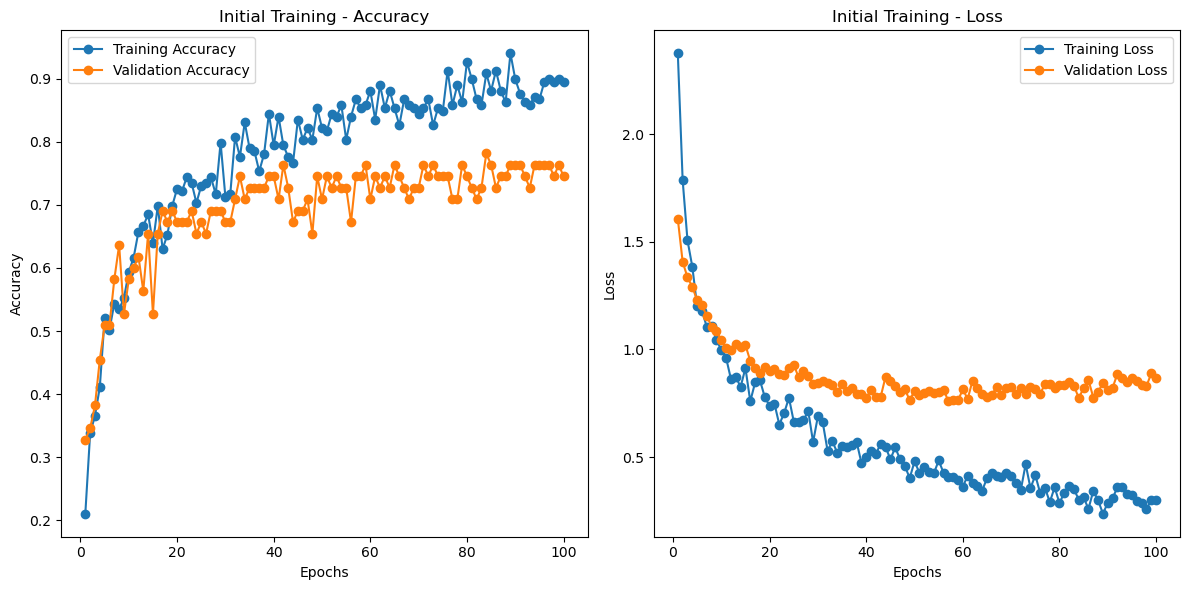

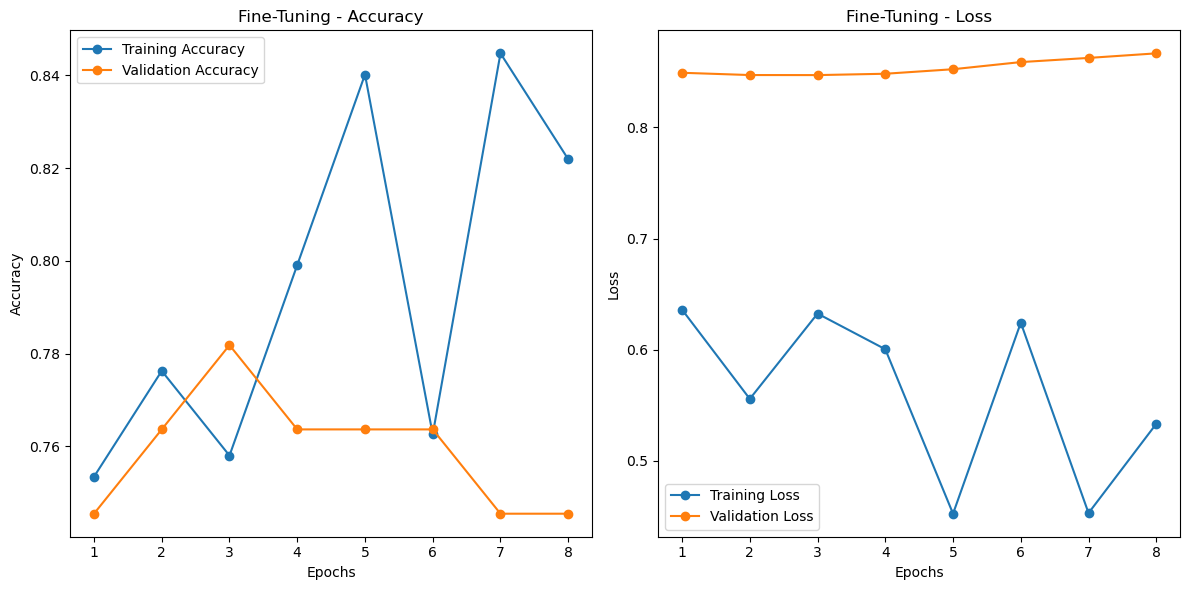

In [2]:
import matplotlib.pyplot as plt

# Assuming `history` contains the model training history (e.g., `initial_history`, `fine_tune_history`, etc.)

def plot_training_history(final_fine_tune_history, title_prefix="Model Training"):
    # Get the metrics
    acc = final_fine_tune_history.history['accuracy']
    val_acc = final_fine_tune_history.history['val_accuracy']
    loss = final_fine_tune_history.history['loss']
    val_loss = final_fine_tune_history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title(f"{title_prefix} - Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title(f"{title_prefix} - Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Example Usage:
plot_training_history(initial_history, title_prefix="Initial Training")
plot_training_history(fine_tune_history, title_prefix="Fine-Tuning")


/home/batch25/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
Accuracy: 0.1818
Precision: 0.1777
Recall: 0.1818
F1-Score: 0.1794

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.25      0.26        12
           1       0.25      0.27      0.26        11
           2       0.25      0.27      0.26        11
           3       0.10      0.10      0.10        10
           4       0.00      0.00      0.00        11

    accuracy                           0.18        55
   macro avg       0.17      0.18      0.18        55
weighted avg       0.18      0.18      0.18        55



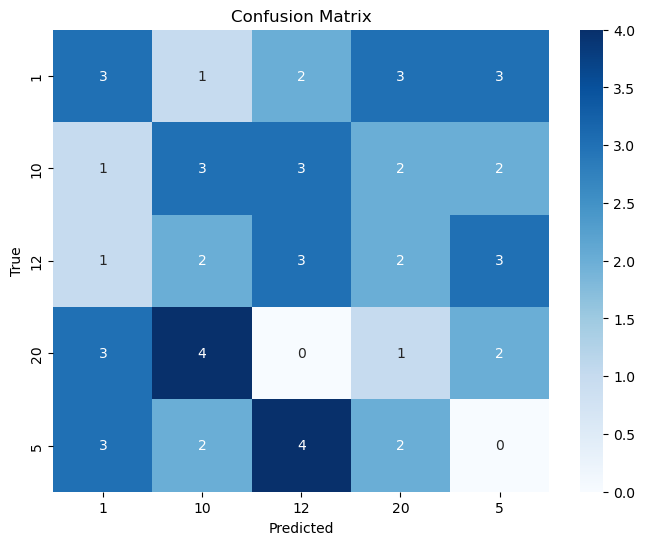

In [3]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Load the previously saved model
model = load_model('/home/batch25/hasta_gesture_model.keras')  # Replace with your saved model path

# Assuming you have a test data generator (test_generator)
# Make predictions on the test data
y_pred = model.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Get true labels for the test set
y_true = t_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# If you want a detailed classification report (for each class):
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Compute confusion matrix if needed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices, yticklabels=val_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7348 - loss: 0.8678
Test Loss: 0.8261129260063171
Test Accuracy: 0.7272727489471436
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
              precision    recall  f1-score   support

           1       0.10      0.08      0.09        12
          10       0.21      0.27      0.24        11
          12       0.18      0.18      0.18        11
          20       0.30      0.30      0.30        10
           5       0.40      0.36      0.38        11

    accuracy                           0.24        55
   macro avg       0.24      0.24      0.24        55
weighted avg       0.24      0.24      0.23        55

Precision: 0.2356
Recall: 0.2364
F1-Score: 0.2349


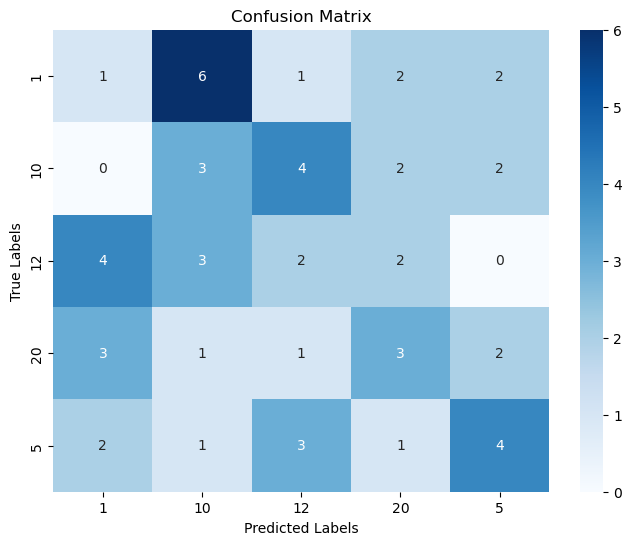

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(val_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test data
y_pred = model.predict(val_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Get true labels for the test set
y_true = val_generator.classes
# Print the classification report (precision, recall, F1-score)
report = classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys())
print(report)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=val_generator.class_indices.keys(), 
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


